# Sprint 2 EDA

## Distribution of key variables:

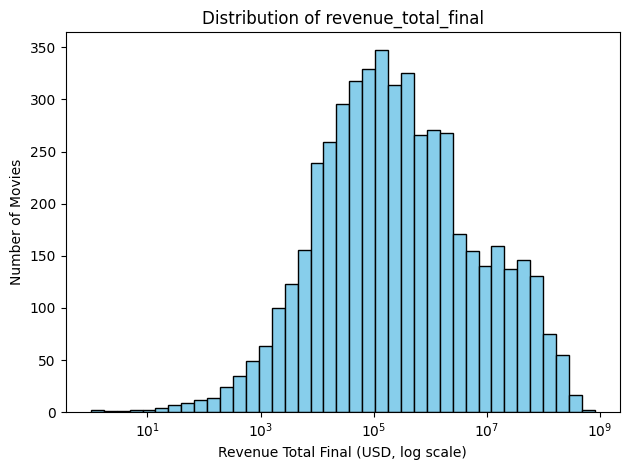

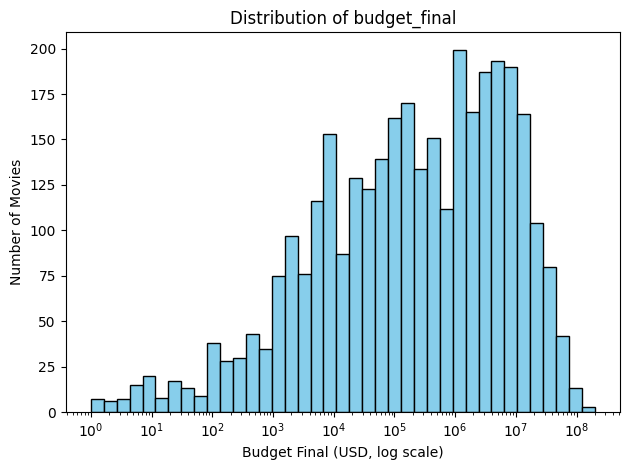

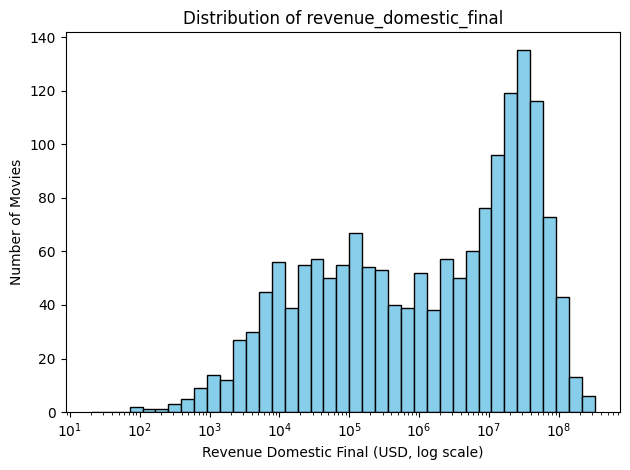

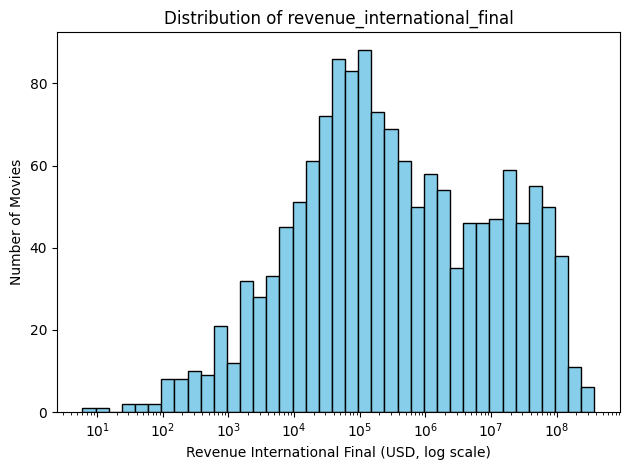

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("horror_data_master_v10_final_only.csv", low_memory=False)

# Columns to visualize
financial_cols = [
    "revenue_total_final",
    "budget_final",
    "revenue_domestic_final",
    "revenue_international_final"
]

for col in financial_cols:
    if col in df.columns:
        # Keep only valid, nonzero numbers
        x = pd.to_numeric(df[col], errors="coerce")
        x = x[(x.notna()) & (x > 0)]

        if len(x) > 0:
            plt.figure()
            # Use log-spaced bins but keep actual $ values on the x-axis
            bins = np.logspace(np.log10(x.min()), np.log10(x.max()), 40)
            plt.hist(x, bins=bins, color="skyblue", edgecolor="black")
            plt.xscale("log")  # log axis, not log data

            plt.title(f"Distribution of {col}")
            plt.xlabel(f"{col.replace('_', ' ').title()} (USD, log scale)")
            plt.ylabel("Number of Movies")
            plt.tight_layout()
            plt.show()


runtime distribution:

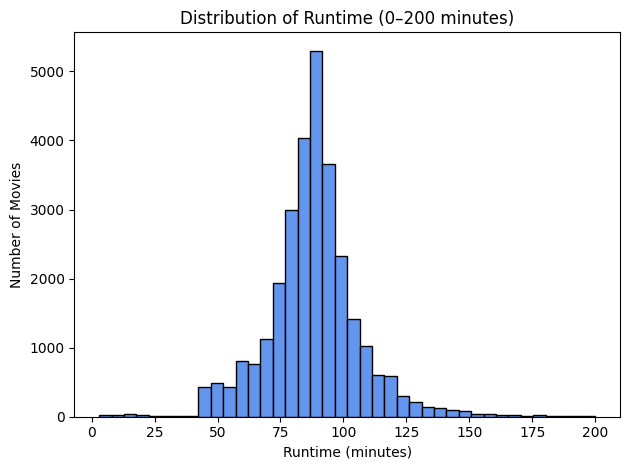

In [2]:

# Load dataset
df = pd.read_csv("horror_data_master_v10_final_only.csv", low_memory=False)

# Use only valid runtimes above 0 and below 200 minutes
col_runtime = "runtime_final"
if col_runtime in df.columns:
    x = pd.to_numeric(df[col_runtime], errors="coerce")
    x = x[(x.notna()) & (x > 0) & (x <= 200)]

    plt.figure()
    plt.hist(x, bins=40, color="cornflowerblue", edgecolor="black")
    plt.title("Distribution of Runtime (0–200 minutes)")
    plt.xlabel("Runtime (minutes)")
    plt.ylabel("Number of Movies")
    plt.tight_layout()
    plt.show()



Release month distribution:

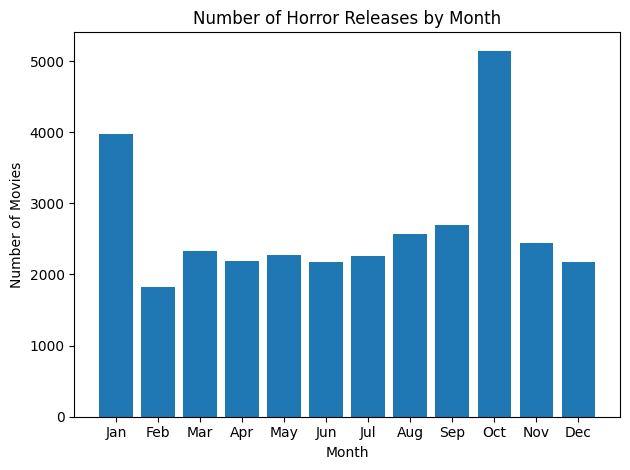

In [3]:
import calendar

# Pick the best column
date_col = "release_date_final2" if "release_date_final2" in df.columns else None

if date_col:
    dates = pd.to_datetime(df[date_col], errors="coerce")
    months = dates.dt.month
    months = months[months.notna() & (months > 0)]

    counts = months.value_counts().sort_index()
    counts = counts.reindex(range(1, 13), fill_value=0)

    plt.figure()
    plt.bar(counts.index, counts.values)
    plt.title("Number of Horror Releases by Month")
    plt.xlabel("Month")
    plt.ylabel("Number of Movies")
    plt.xticks(ticks=range(1,13), labels=[calendar.month_abbr[m] for m in range(1,13)])
    plt.tight_layout()
    plt.show()


Distribution br region

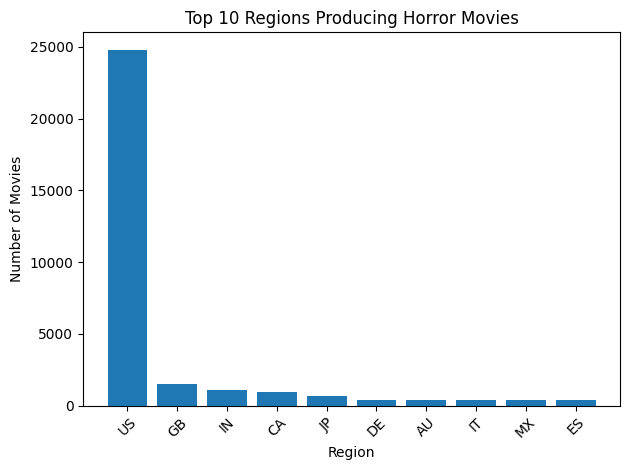

In [4]:
col_region = "region_final"

if col_region in df.columns:
    counts = df[col_region].dropna().value_counts().head(10)
    plt.figure()
    plt.bar(counts.index, counts.values)
    plt.title("Top 10 Regions Producing Horror Movies")
    plt.xlabel("Region")
    plt.ylabel("Number of Movies")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Distribution of IMDB ratings

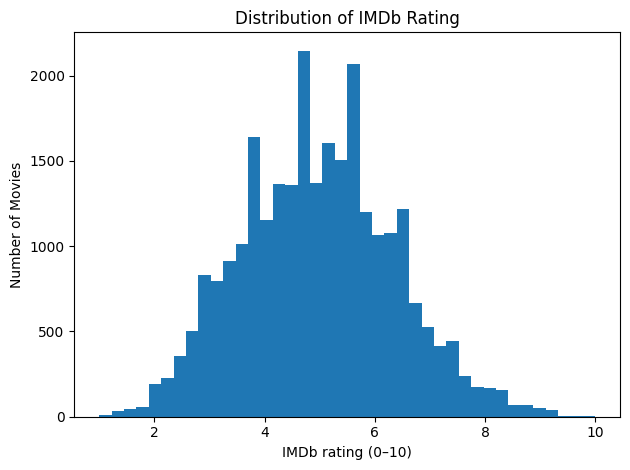

In [5]:
col_rating = "rating_imdb_final"

if col_rating in df.columns:
    x = pd.to_numeric(df[col_rating], errors="coerce").dropna()
    plt.figure()
    plt.hist(x, bins=40)
    plt.title("Distribution of IMDb Rating")
    plt.xlabel("IMDb rating (0–10)")
    plt.ylabel("Number of Movies")
    plt.tight_layout()
    plt.show()


Summary stats

In [6]:
import pandas as pd

# Load your dataset
df = pd.read_csv("horror_data_master_v10_final_only.csv", low_memory=False)

# Select numeric columns you're analyzing
num_cols = [
    "revenue_total_final",
    "budget_final",
    "rating_imdb_final",
    "votes_imdb_final",
    "runtime_final"
]

# Clean and summarize
summary = {}

for col in num_cols:
    if col in df.columns:
        # Convert to numeric and remove NaN or 0 (for financials)
        x = pd.to_numeric(df[col], errors="coerce")
        if "revenue" in col or "budget" in col:
            x = x[x > 0]  # remove zeros for financials
        else:
            x = x.dropna()

        # Only add if there’s actual data
        if len(x) > 0:
            summary[col] = {
                "Count": len(x),
                "Mean": round(x.mean(), 2),
                "Median": round(x.median(), 2),
                "Std Dev": round(x.std(), 2),
                "25th %ile": round(x.quantile(0.25), 2),
                "75th %ile": round(x.quantile(0.75), 2),
                "Max": round(x.max(), 2)
            }

# Convert summary to DataFrame for a clean table view
summary_df = pd.DataFrame(summary).T
print(summary_df)


                       Count         Mean    Median      Std Dev  25th %ile  \
revenue_total_final   5024.0  11168968.28  228345.5  40096816.09   30039.75   
budget_final          3340.0   4677122.34  275000.0  12029543.79   15000.00   
rating_imdb_final    26761.0         4.96       5.0         1.39       4.00   
votes_imdb_final     26795.0      5188.45     183.0     32399.39      40.00   
runtime_final        29270.0        88.24      88.0        22.08      79.00   

                     75th %ile          Max  
revenue_total_final  2145361.0  814641172.0  
budget_final         3262500.0  200000000.0  
rating_imdb_final          5.9         10.0  
votes_imdb_final        1043.0    1667549.0  
runtime_final             96.0       1440.0  


###What do these distributions tell me about my data?

The univariate graphs show that most horror movies earn relatively small amounts both domestically and internationally, with a few very high grossing titles creating a long right tail in the data. Runtime is fairly consistent across the genre, clustering around 90 minutes, which fits typical expectations for horror films. Release timing shows a clear seasonal trend, with a major spike in October releases that aligns with the Halloween season. IMDb ratings mostly fall between 4 and 6 out of 10, showing that while horror is popular it rarely receives very high scores from the general audiences. Finally, the United States dominates horror movie production, but I will look into if this is the case or my data is just very biased.

## Bivariate/Multivariate Analysis

Realtionship with rev

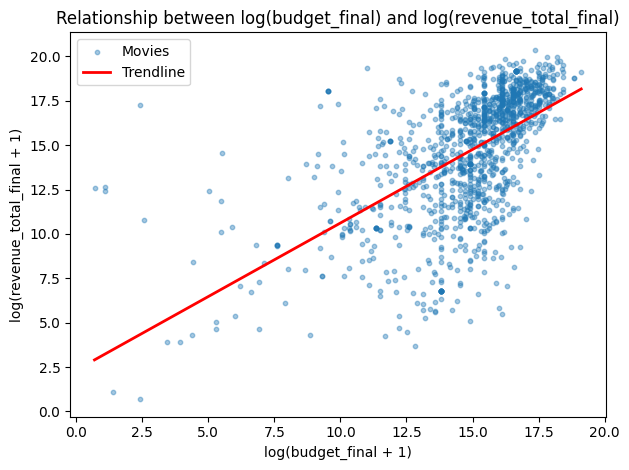

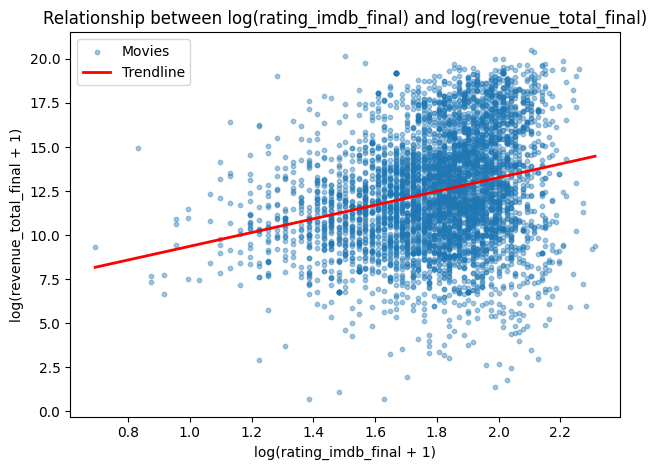

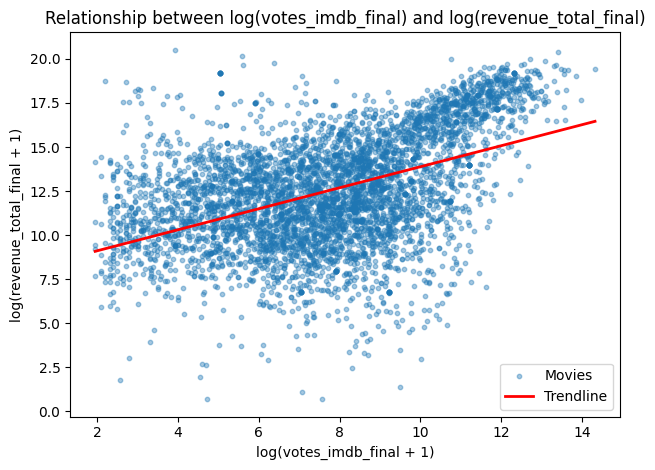

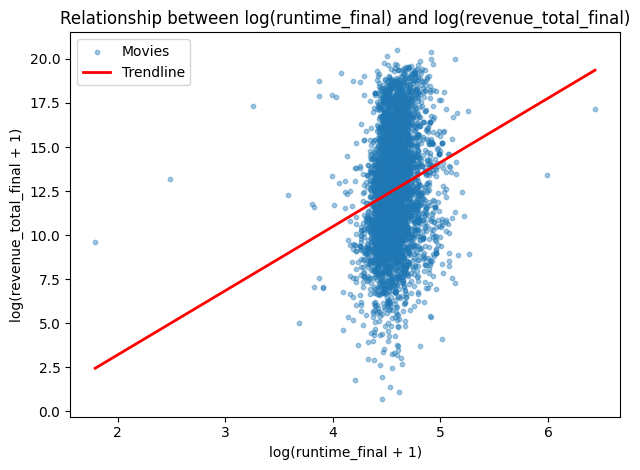

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("horror_data_master_v10_final_only.csv", low_memory=False)

target = "revenue_total_final"
features = ["budget_final", "rating_imdb_final", "votes_imdb_final", "runtime_final"]

# Keep only movies with real (nonzero) revenue
df[target] = pd.to_numeric(df[target], errors="coerce")
df = df[df[target] > 0]

for col in features:
    if col in df.columns:
        x = pd.to_numeric(df[col], errors="coerce")
        x = x[(x.notna()) & (x > 0)]
        sub = df.loc[x.index, [col, target]].dropna()

        if len(sub) > 30:
            x_log = np.log1p(sub[col])
            y_log = np.log1p(sub[target])

            plt.figure()
            plt.scatter(x_log, y_log, s=10, alpha=0.4, label="Movies")

            # Add a simple linear fit line
            m, b = np.polyfit(x_log, y_log, 1)
            x_line = np.linspace(x_log.min(), x_log.max(), 100)
            y_line = m * x_line + b
            plt.plot(x_line, y_line, color="red", linewidth=2, label="Trendline")

            plt.title(f"Relationship between log({col}) and log({target})")
            plt.xlabel(f"log({col} + 1)")
            plt.ylabel(f"log({target} + 1)")
            plt.legend()
            plt.tight_layout()
            plt.show()



Correlation matrix of how numeric features relate

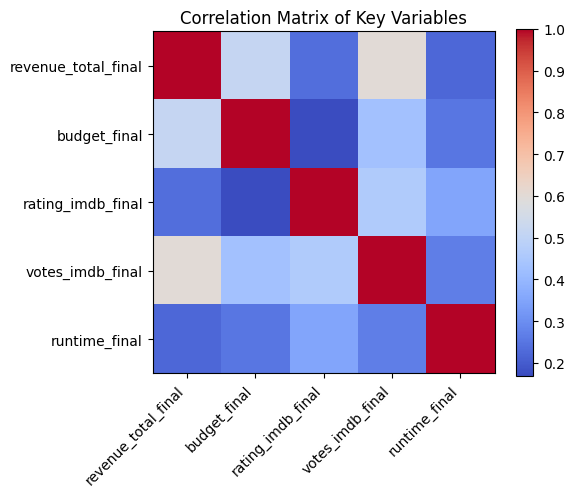

                     revenue_total_final  budget_final  rating_imdb_final  \
revenue_total_final             1.000000      0.514043           0.236508   
budget_final                    0.514043      1.000000           0.169179   
rating_imdb_final               0.236508      0.169179           1.000000   
votes_imdb_final                0.597900      0.431475           0.461425   
runtime_final                   0.223128      0.252276           0.353577   

                     votes_imdb_final  runtime_final  
revenue_total_final          0.597900       0.223128  
budget_final                 0.431475       0.252276  
rating_imdb_final            0.461425       0.353577  
votes_imdb_final             1.000000       0.267371  
runtime_final                0.267371       1.000000  


In [8]:
num_cols = ["revenue_total_final","budget_final","rating_imdb_final","votes_imdb_final","runtime_final"]
num_df = df[num_cols].apply(pd.to_numeric, errors="coerce").dropna()
corr = num_df.corr()

plt.figure(figsize=(6,5))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix of Key Variables")
plt.tight_layout()
plt.show()

print(corr)


Grouped Comp of rev by release month

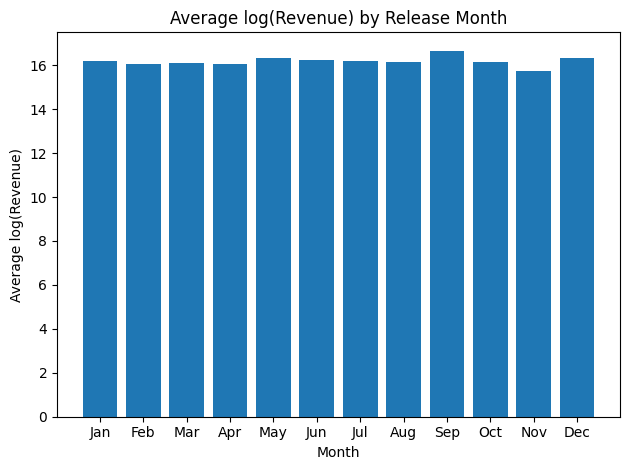

In [9]:
import calendar

date_col = "release_date_final2"
dates = pd.to_datetime(df[date_col], errors="coerce")
df["month"] = dates.dt.month

grouped = df.groupby("month")["revenue_total_final"].mean().reindex(range(1,13))

plt.figure()
plt.bar(range(1,13), np.log1p(grouped))
plt.title("Average log(Revenue) by Release Month")
plt.xlabel("Month")
plt.ylabel("Average log(Revenue)")
plt.xticks(range(1,13), [calendar.month_abbr[m] for m in range(1,13)])
plt.tight_layout()
plt.show()
